In [1]:
from glio.importsall import *
from torchzero.nn.layers.nca_conv import SimpleNCAConv
import torch

In [2]:
conv = SimpleNCAConv(4, kernel_size=3, nsteps=(10,20))
conv

SimpleNCAConv(
  (conv): ConvBlock(
    (0): Conv2d(4, 4, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
  )
)

In [3]:
conv(torch.randn(3, 4, 96, 96)).shape

torch.Size([3, 4, 96, 96])

torch.Size([1, 4, 198, 224])


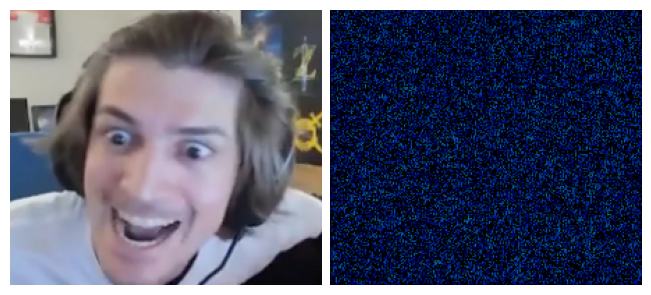

In [4]:
from glio.loaders.image import imread
x:torch.Tensor = imread(r"F:\Stuff\Images\Сохраненное\Low effort\xqcmad.png").unsqueeze(0)
print(x.shape)
qimshow_grid([x[0], conv(x)[0]], nrow=1)

In [5]:
conv = SimpleNCAConv(4, kernel_size=3, nsteps=(10,20), device=torch.device('cuda'), mask_drop_p=0.1)
x = x.to(device = torch.device('cuda'), dtype=torch.float32)
opt = optim.AdamW(conv.parameters(), lr=1e-3)
preds = []
for i in range(500):
    yhat = conv(x)
    preds.append(yhat[0].detach().cpu())
    loss = F.mse_loss(yhat, x)
    print(i, loss, end = '\r')
    opt.zero_grad()
    loss.backward()
    opt.step()

In [6]:
show_slices(preds)

interactive(children=(Checkbox(value=False, description='color'), IntSlider(value=249, description='s0', max=4…

<function glio.jupyter_tools.show_slices.<locals>.f(color, **kwargs)>

torch.Size([4, 1077, 1085])


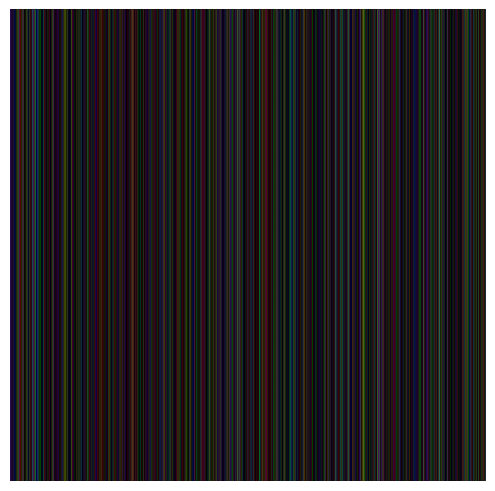

In [7]:
x2:torch.Tensor = imread(r"F:\Stuff\Images\Сохраненное\Low effort\catr.png").to(dtype = torch.float32, device=torch.device('cuda'))
print(x2.shape)
yhat = conv(x2)
qimshow(yhat)